In [48]:
# Lets start the code by importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import IncrementalPCA
from tqdm import tqdm

In [62]:
# Load training dataset
train_data = pd.read_csv("/content/fraudTrain.csv")

# Load testing dataset
test_data = pd.read_csv("/content/fraudTest.csv")

In [63]:
train_data.head(3)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1.325376e+09,36.011293,-82.048315,0.0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1.325376e+09,49.159047,-118.186462,0.0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1.325376e+09,43.150704,-112.154481,0.0


In [64]:
train_data.shape

(7805, 23)

In [65]:
test_data.head(3)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497.0,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1.371817e+09,33.986391,-81.200714,0.0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302.0,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1.371817e+09,39.450498,-109.960431,0.0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496.0,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1.371817e+09,40.495810,-74.196111,0.0


In [66]:
test_data.shape

(77779, 23)

In [67]:
# Combine training and testing data for encoding consistency
combined_data = pd.concat([train_data, test_data], axis=0)

In [68]:
combined_data.shape

(85584, 23)

In [69]:
combined_data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495.0,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1.325376e+09,36.011293,-82.048315,0.0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149.0,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1.325376e+09,49.159047,-118.186462,0.0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154.0,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1.325376e+09,43.150704,-112.154481,0.0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939.0,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1.325376e+09,47.034331,-112.561071,0.0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99.0,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1.325376e+09,38.674999,-78.632459,0.0


In [70]:
def extract_datetime_features(df):
    df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
    df['day_of_week'] = df['trans_date_trans_time'].dt.dayofweek
    df['hour_of_day'] = df['trans_date_trans_time'].dt.hour
    df.drop('trans_date_trans_time', axis=1, inplace=True)
    return df

combined_data = extract_datetime_features(combined_data)

In [71]:
# Drop irrelevant columns (you can customize this based on your data)
columns_to_drop = ["first", "last", "job", "dob", "trans_num", "street"]
combined_data.drop(columns_to_drop, axis=1, inplace=True)

In [72]:
combined_data.shape

(85584, 18)

In [73]:
# Separate features and target variable
X_combined = combined_data.drop("is_fraud", axis=1)
y_combined = combined_data["is_fraud"]

In [74]:
# Encode the "merchant" and "category" columns using LabelEncoder
label_encoder = LabelEncoder()
X_combined["merchant"] = label_encoder.fit_transform(X_combined["merchant"])
X_combined["category"] = label_encoder.fit_transform(X_combined["category"])

In [75]:
# One-hot encode categorical variables with handle_unknown='ignore'
categorical_columns = ["gender", "city", "state"]
onehot_encoder = OneHotEncoder(sparse=False, drop="first", handle_unknown='ignore')
X_combined_categorical = onehot_encoder.fit_transform(X_combined[categorical_columns])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [76]:
# Standardize the numeric features
scaler = StandardScaler()
X_combined_numeric = scaler.fit_transform(X_combined.drop(categorical_columns, axis=1))

In [77]:
# Combine one-hot encoded categorical features with numeric features
X_combined_encoded = np.hstack((X_combined_numeric, X_combined_categorical))

In [78]:
# Split the combined data back into training and test datasets
X_train = X_combined_encoded[:len(train_data)]
X_test = X_combined_encoded[len(train_data):]
y_train = y_combined[:len(train_data)]
y_test = y_combined[len(train_data):]

In [79]:
y_train = y_train.dropna()

In [80]:
print(y_train.isnull().sum())

0


In [84]:
X_train = np.delete(X_train, 0, axis=0)

In [92]:
#  code to remove nan values from X_train

X_train = X_train[~np.isnan(X_train).any(axis=1)]


In [94]:
# code to remove one vale from y_train

y_train = np.delete(y_train, 0, axis=0)


In [95]:
from sklearn.model_selection import train_test_split
# Address class imbalance using SMOTE on the training data
sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X_train, y_train)

In [96]:
# Apply Incremental PCA for dimensionality reduction
n_components = 100  # Adjust the number of components as needed
ipca = IncrementalPCA(n_components=n_components)

In [97]:
# Apply Incremental PCA to training data with progress bar
for batch in tqdm(np.array_split(X_resampled, 10), desc="Applying Incremental PCA"):
    ipca.partial_fit(batch)

Applying Incremental PCA: 100%|██████████| 10/10 [00:11<00:00,  1.19s/it]


In [98]:
# Replace NaN values in X_test with the mean of each column
X_test = np.nan_to_num(X_test, nan=np.nanmean(X_test, axis=0))

In [99]:
# Transform the training and testing data
X_resampled_pca = ipca.transform(X_resampled)
X_test_pca = ipca.transform(X_test)

In [101]:
# Train a Logistic Regression model
from sklearn.linear_model import LogisticRegression
logistic_regression_classifier = LogisticRegression(random_state=42)
logistic_regression_classifier.fit(X_resampled_pca, y_resampled)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


RandomForestClassifier(random_state=42)

In [102]:
# Train a Decision Tree model
from sklearn.tree import DecisionTreeClassifier
decision_tree_classifier = DecisionTreeClassifier(random_state=42)
decision_tree_classifier.fit(X_resampled_pca, y_resampled)

DecisionTreeClassifier(random_state=42)

In [103]:
# Train the Random Forest model
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_resampled_pca, y_resampled)

RandomForestClassifier(random_state=42)

In [110]:
# Make predictions on the test data
y_pred_logistic_regression = logistic_regression_classifier.predict(X_test_pca)
y_pred_decision_tree = decision_tree_classifier.predict(X_test_pca)
y_pred_random_forest = rf_classifier.predict(X_test_pca)

In [108]:
y_test = y_test.dropna()

In [115]:
y_pred_logistic_regression = np.delete(y_pred_logistic_regression, 0, axis=0)
y_pred_decision_tree = np.delete(y_pred_decision_tree, 0, axis=0)
y_pred_random_forest = np.delete(y_pred_random_forest, 0, axis=0)

In [118]:
# Calculate and compare accuracy scores
accuracy_logistic_regression = accuracy_score(y_test, y_pred_logistic_regression)
accuracy_decision_tree = accuracy_score(y_test, y_pred_decision_tree)
accuracy_random_forest = accuracy_score(y_test, y_pred_random_forest)

print("Logistic Regression Accuracy:", accuracy_logistic_regression)
print("Decision Tree Accuracy:", accuracy_decision_tree)
print("Random Forest Accuracy:", accuracy_random_forest)


Logistic Regression Accuracy: 0.984031474195788
Decision Tree Accuracy: 0.9874643215305099
Random Forest Accuracy: 0.9962328679060917


In [116]:
# Print the confusion matrices
print("Logistic Regression Confusion Matrix:\n", confusion_matrix(y_test, y_pred_logistic_regression))
print("Decision Tree Confusion Matrix:\n", confusion_matrix(y_test, y_pred_decision_tree))
print("Random Forest Confusion Matrix:\n", confusion_matrix(y_test, y_pred_random_forest))


Logistic Regression Confusion Matrix:
 [[76531   962]
 [  280     5]]
Decision Tree Confusion Matrix:
 [[76797   696]
 [  279     6]]
Random Forest Confusion Matrix:
 [[77484     9]
 [  284     1]]


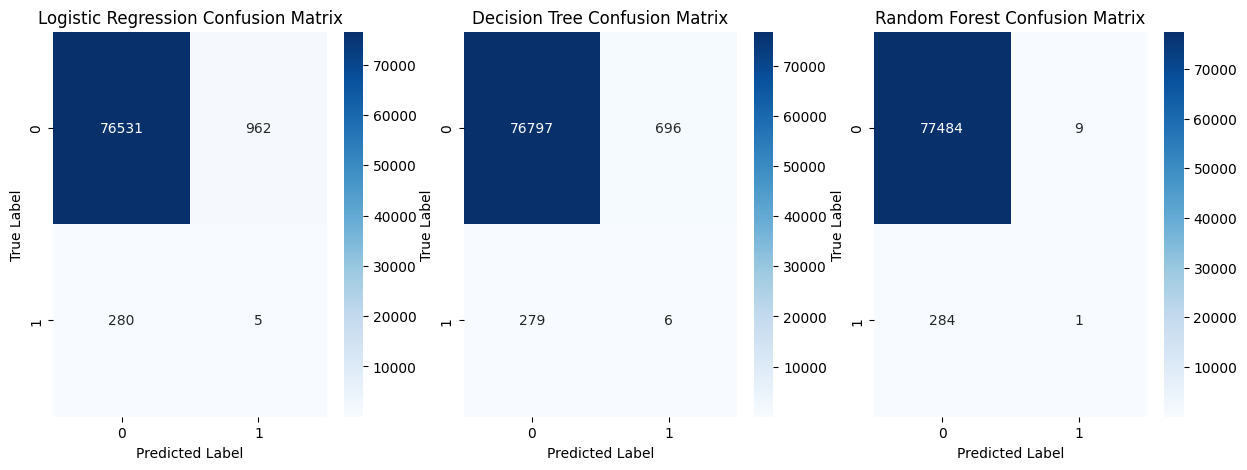

In [120]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a function to plot confusion matrices for different models
def plot_confusion_matrices(y_true, y_pred_list, model_names):
    fig, axes = plt.subplots(1, len(model_names), figsize=(15, 5))
    for i, (y_pred, model_name) in enumerate(zip(y_pred_list, model_names)):
        cm = confusion_matrix(y_true, y_pred)
        sns.heatmap(cm, annot=True, fmt="d", ax=axes[i], cmap="Blues")
        axes[i].set_title(f"{model_name} Confusion Matrix")
        axes[i].set_xlabel("Predicted Label")
        axes[i].set_ylabel("True Label")
    plt.show()

# Plot the confusion matrices
model_names = ["Logistic Regression", "Decision Tree", "Random Forest"]
plot_confusion_matrices(y_test, [y_pred_logistic_regression, y_pred_decision_tree, y_pred_random_forest], model_names)
